In [7]:
############################################################
####### Codi creat per Laia Casamiquela Juliol 2021 ########
# Exemple d'estimació de la distancia i edat d'un cúmul obert 
# utilitzant fotometria B,V de Johnson
############################################################


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
lab = ['$\mathrm{O}5$','$\mathrm{B}5$','$\mathrm{A}5$','$\mathrm{F}0$','$\mathrm{F}5$',\
       '$\mathrm{G}5$','$\mathrm{K}0$','$\mathrm{K}5$','$\mathrm{M}0$','$\mathrm{M}5$']
Xpos = [-0.4,-0.2,0.1,0.25,0.4,0.65,0.85,1.15,1.4,1.6]

# Carreguem les dades

In [105]:
# DADES: com a exemple carreguem la fotometria de les Pleiades obtingudes per Bouy et al. 2015 (https://arxiv.org/abs/1502.03728)
cols = ['DANCe','RAdeg','DEdeg','pmRA','pmDE','e_pmRA','e_pmDE','BTmag','e_BTmag','VTmag','e_VTmag','rmag',\
        'e_rmag','gmag','e_gmag','imag','e_imag','Jmag','e_Jmag','Hmag','e_Hmag','Kmag','e_Kmag','Qflg',\
        'W1','e_W1','W2','e_W2','W3','e_W3','W4','e_W4','Pmb','Teff','e_Teff','Lbol','e_Lbol']
f = pd.read_csv('dancept.dat',delim_whitespace=True,names=cols)
pleiades = f.query('(Pmb>0.85) & (VTmag<11)')

#### per a un altre cas caldrà carregar les dades experimentals de cúmul en qüestió:
#   magnituds B i V de les estrelles individuals

In [106]:
# MODELS: carreguem les isocrones de PARSEC versio 1.2S (5 models d'edats diferents)
iso = pd.read_csv('isocrones_mod.csv')

# Plot

In [121]:
# es pot jugar amb l'extinció i la distancia per tal de fer quadrar les dades corregides
# amb la seqüència principal dels models d'isocrona
av = 0.12
d = 130.

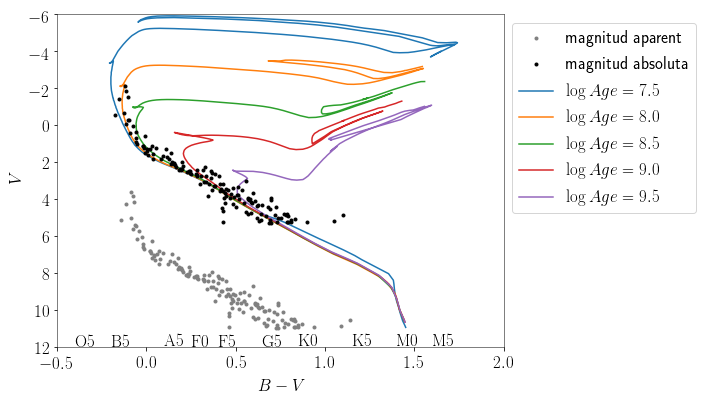

In [125]:
params = {'backend': 'pdf',
         'axes.linewidth': 0.5,
         'axes.labelsize': 17,
         'font.size': 17,
         'legend.fontsize': 17,
         'xtick.labelsize': 17,
         'ytick.labelsize':17,
         'text.usetex': True}
plt.rcParams.update(params)

fig, ax = plt.subplots(1,1, figsize=(10,6))
fig.subplots_adjust(hspace = 0.18, wspace=0.15,left=0.08,right=0.7,top=0.9,bottom=0.13)

#plot de les magnituds i colors aparents
ax.plot(pleiades.BTmag-pleiades.VTmag,pleiades.VTmag,marker='o',\
        color='gray',linestyle='None',ms=3,label='magnitud aparent')

#plot de les magnituds corregides pel modul de distancia, i els colors corregits d'extinció
DM = 5.*np.log10(d/10.)+av
EBV = av/3.1
ax.plot(pleiades.BTmag-pleiades.VTmag-EBV,pleiades.VTmag-DM,marker='o',\
        color='k',linestyle='None',ms=3,label='magnitud absoluta')

#plot dels models
for age in iso.logAge.unique():
    ax.plot(iso.query('logAge == @age').Bmag-iso.query('logAge == @age').Vmag,\
             iso.query('logAge == @age').Vmag,label='$\log Age='+str(age)+'$',zorder=0)
for l,x in zip(lab,Xpos):
    ax.annotate(l,xy=(x,12),xytext=(x,12))
    

ax.set_ylim(12,-6)
ax.set_xlim(-0.5,2)
ax.legend(bbox_to_anchor=(1., 1.), loc="upper left",ncol=1, fancybox=True)
ax.set_xlabel('$B-V$')
ax.set_ylabel('$V$')

fig.savefig('pleiades_isocrones.pdf')

In [ ]:
# per aquestes dades de les Pléiades obtenim que el cúmul està a 130 pc i té una edat de logAge=8 (100 Myr)

In [64]:
isocrones = pd.read_csv('isocronas0.csv',delim_whitespace=True)
# get rid of shit
iso = isocrones.query('Vmag<11')
iso = iso.loc[~((iso.logAge==8.) & (iso.Mini>5.3045))]
iso = iso.loc[~((iso.logAge==8.5) & (iso.Mini>3.4219))]
iso = iso.loc[~((iso.logAge==9) & (iso.Mini>2.3071))]
iso = iso.loc[~((iso.logAge==9.5) & (iso.Mini>1.4731))]

In [93]:
iso[['logAge','Bmag','Vmag']].to_csv('isocrones_mod.csv')